# Задача 1. Анализ данных

1. Загрузите наименование активностей и столбцов

    - файл активностей: `activity_labels.txt`
    - файл наименований столбцов: `features.txt`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
_DIR = 'UCI_HAR_Dataset'
_ACIVITY_LABELS = _DIR + '/activity_labels.txt'
_FEATURES = _DIR + '/features.txt'
_TRAIN_DIR = _DIR + '/train'
_SUBJECT_TRAIN = _TRAIN_DIR + '/subject_train.txt'
_X_TRAIN = _TRAIN_DIR + '/X_train.txt'
_Y_TRAIN = _TRAIN_DIR + '/y_train.txt'
_TEST_DIR = _DIR + '/test'
_SUBJECT_TEST = _TEST_DIR + '/subject_test.txt'
_X_TEST = _TEST_DIR + '/X_test.txt'
_Y_TEST = _TEST_DIR + '/y_test.txt'
RANDOM_STATE=1234

In [3]:
activity_labels = pd.read_csv(_ACIVITY_LABELS, header=None, sep="\s+", index_col = 0).squeeze()
activity_labels

0
1               WALKING
2      WALKING_UPSTAIRS
3    WALKING_DOWNSTAIRS
4               SITTING
5              STANDING
6                LAYING
Name: 1, dtype: object

In [4]:
features = pd.read_csv(_FEATURES, header=None, sep="\s+", index_col = 0).squeeze()
features = features.reset_index(drop=True)
for index, row in features.iteritems():
    features[index] = "{}_{}".format(row, index)
features


0                           tBodyAcc-mean()-X_0
1                           tBodyAcc-mean()-Y_1
2                           tBodyAcc-mean()-Z_2
3                            tBodyAcc-std()-X_3
4                            tBodyAcc-std()-Y_4
                         ...                   
556        angle(tBodyGyroMean,gravityMean)_556
557    angle(tBodyGyroJerkMean,gravityMean)_557
558                    angle(X,gravityMean)_558
559                    angle(Y,gravityMean)_559
560                    angle(Z,gravityMean)_560
Name: 1, Length: 561, dtype: object


2. Загрузите обучающее множество с идентификатором испытуемых, признаков и целевых значений (активностей). Сформируйте один датафрейм. В качестве наименований столбцов указать ранее загруженные из файла

    - файл испытуемых: `subject_train.txt`
    - файл признаков: `X_train.txt`
    - файл целевых значений: `y_train.txt`

Пример команды загрузки файла в датафрейм:
```python
pd.read_csv(X_TRAIN_FILE, header=None, sep="\s+", names=CLMS)
```

In [5]:
subjects = pd.read_csv(_SUBJECT_TRAIN, header=None, sep="\s+", names=['Subject'])
x_train = pd.read_csv(_X_TRAIN, header=None, sep="\s+",names=features)
y_train = pd.read_csv(_Y_TRAIN, header=None, sep="\s+", names=['Activity'])
y_train.replace(activity_labels.to_dict(), inplace=True)
df = pd.merge(subjects, x_train, left_index=True, right_index=True)
df = pd.merge(df, y_train, left_index=True, right_index=True)
df.head()


,Subject,tBodyAcc-mean()-X_0,tBodyAcc-mean()-Y_1,tBodyAcc-mean()-Z_2,tBodyAcc-std()-X_3,tBodyAcc-std()-Y_4,tBodyAcc-std()-Z_5,tBodyAcc-mad()-X_6,tBodyAcc-mad()-Y_7,tBodyAcc-mad()-Z_8,...,fBodyBodyGyroJerkMag-skewness()_552,fBodyBodyGyroJerkMag-kurtosis()_553,"angle(tBodyAccMean,gravity)_554","angle(tBodyAccJerkMean),gravityMean)_555","angle(tBodyGyroMean,gravityMean)_556","angle(tBodyGyroJerkMean,gravityMean)_557","angle(X,gravityMean)_558","angle(Y,gravityMean)_559","angle(Z,gravityMean)_560",Activity
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING



3. Отобразите количество каждой активности в виде столбчатой диаграммы

<AxesSubplot:xlabel='Activity', ylabel='Window count'>

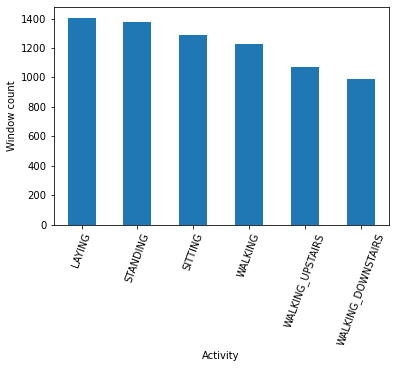

In [6]:
df.Activity.value_counts().plot.bar(xlabel="Activity", ylabel="Window count", rot=70)

4. Для 5го испытуемого отобразите столбчатую диаграмму его активностей (примерный вид как в п.3)


<AxesSubplot:xlabel='Activity', ylabel='Window count'>

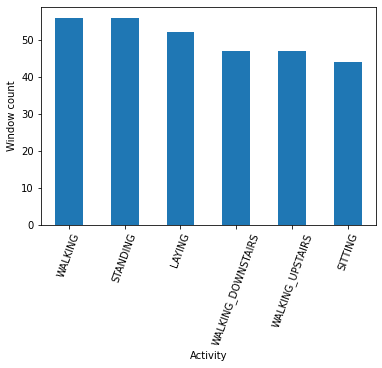

In [7]:
fifth = df[df.Subject == 5]
fifth.Activity.value_counts().plot.bar(xlabel="Activity", ylabel="Window count", rot=70)


5. Для 5го испытуемого отобразите средние ускорения по всем координатам в виде отдельных `plot` графиков

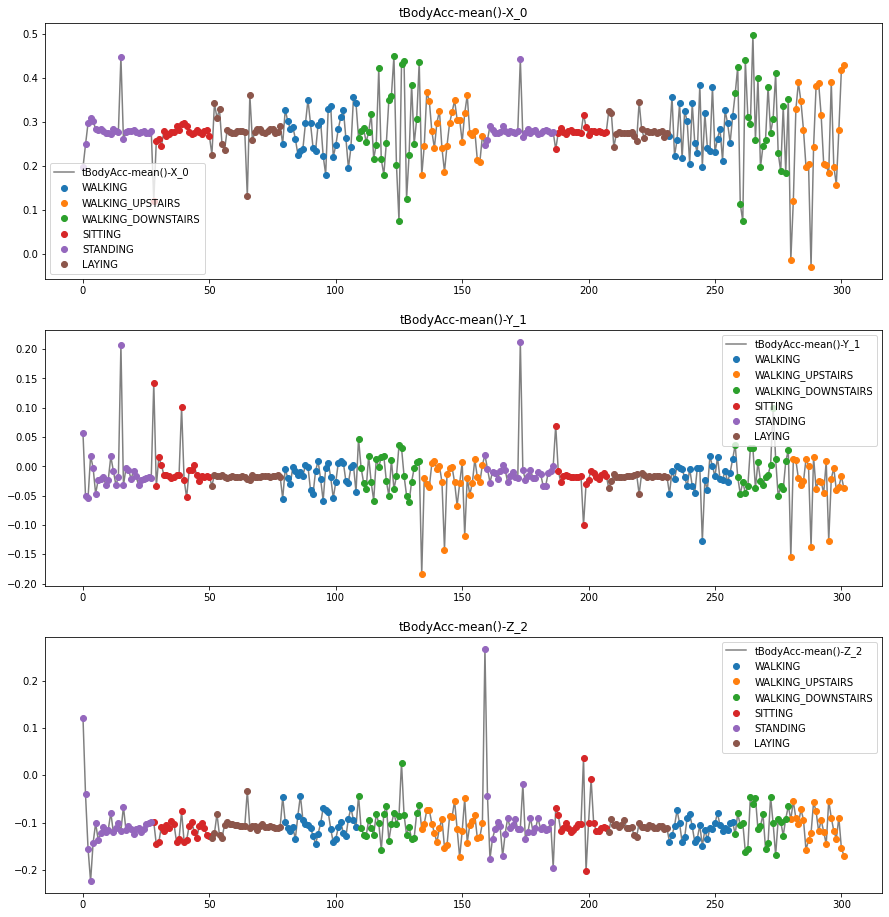

In [8]:
fifth.reset_index(drop=True, inplace=True)
fig, axes = plt.subplots(3, figsize = [15, 16])

for i, attr in [(0,"tBodyAcc-mean()-X_0"), (1,"tBodyAcc-mean()-Y_1"), (2,"tBodyAcc-mean()-Z_2")]:
    fifth[attr].plot(color="grey", legend=True, ax=axes[i], title=attr)
    for index, row in activity_labels.iteritems():
        fifth[fifth.Activity == row][attr].plot(ax=axes[i], label=row, style="o", legend=True)

# Задача 2. Обучение модели (3 балла)

1. Постройте модель полиномиальной логистической регрессии для распознавания активности

Параметры модели:

```python
penalty="l2", 
max_iter=100, 
solver="newton-cg", 
multi_class="multinomial"
```

⚠️ **Замечание.** Перед обучением перетасуйте данные c `random_state` равным 1234:
```python
from sklearn.utils import shuffle
```


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [10]:
x_train, y_train = shuffle(x_train, y_train, random_state=RANDOM_STATE)

In [11]:
logistic_model = LogisticRegression(fit_intercept=True, 
                                    C=float("inf"), 
                                    penalty="l2", 
                                    max_iter=100, 
                                    solver="newton-cg", 
                                    multi_class="multinomial",
                                    random_state=RANDOM_STATE)
logistic_model.fit(x_train, y_train)

/home/mike_geine/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=inf, multi_class='multinomial', random_state=1234,
                   solver='newton-cg')

2. Загрузите тестовое множество признаков и целевых значений(активностей). Сформируйте один датафрейм. В качестве наименований столбцов указать ранее загруженные из файла

    - файл признаков: `X_test.txt`
    - файл целевых значений: `y_test.txt`

In [12]:
x_test = pd.read_csv(_X_TEST, header=None, sep="\s+",names=features)
y_test = pd.read_csv(_Y_TEST, header=None, sep="\s+", names=['Activity'])
y_test.replace(activity_labels.to_dict(), inplace=True)
test = pd.merge(x_test, y_test, left_index=True, right_index=True)
test.head()

,tBodyAcc-mean()-X_0,tBodyAcc-mean()-Y_1,tBodyAcc-mean()-Z_2,tBodyAcc-std()-X_3,tBodyAcc-std()-Y_4,tBodyAcc-std()-Z_5,tBodyAcc-mad()-X_6,tBodyAcc-mad()-Y_7,tBodyAcc-mad()-Z_8,tBodyAcc-max()-X_9,...,fBodyBodyGyroJerkMag-skewness()_552,fBodyBodyGyroJerkMag-kurtosis()_553,"angle(tBodyAccMean,gravity)_554","angle(tBodyAccJerkMean),gravityMean)_555","angle(tBodyGyroMean,gravityMean)_556","angle(tBodyGyroJerkMean,gravityMean)_557","angle(X,gravityMean)_558","angle(Y,gravityMean)_559","angle(Z,gravityMean)_560",Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,STANDING



3. Оцените долю правильных классификаций, полноту, точность и F1 построенного классификатора на тестовом множестве, используйте `.score()` и `classification_report`:
```python
from sklearn.metrics import classification_report
```

In [13]:
from sklearn.metrics import classification_report

In [14]:
y_train__pred = logistic_model.predict(x_train)
y_test__pred = logistic_model.predict(x_test)

print(logistic_model.score(x_test, y_test))

print(classification_report(y_test, y_test__pred))

0.9569053274516457
                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       537
           SITTING       0.94      0.88      0.91       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.98      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



4. Отобразите матрицу ошибок классификатора с указанием активностей

⚠️ **Замечание.** В зависимости от версии `sklearn`

```python
from sklearn.metrics import plot_confusion_matrix

# или

from sklearn.metrics import ConfusionMatrixDisplay

# или

import sys
sys.path.insert(0, "../lib/")
from plot_confusion_matrix import plot_confusion_matrix
```

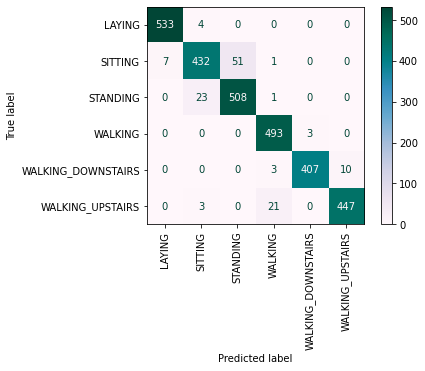

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic_model, x_test, y_test, xticks_rotation='vertical', cmap='PuBuGn')


<!-- 5. Постройте и оцените модель без использования частотных признаков. Как изменится качество классификации?

6. Отобразите матрицу ошибок классификатора с указанием активностей -->


# Задача 3. Выбор модели (4 балла)

- Необходимо построить следующие модели для распознавания активности:
    - k-ближайших соседей: `k=[5,11]`
    - логистическая регрессия: `C=[0.1,1.0]`
    - случайный лес: `n=[50,100]`, где в скобках указаны возможные значения, из которых необходимо будет выбирать

    Для случайного леса используйте `random_state=1234`

- Для каждого типа определить лучший параметр с использованием стратифицированной кросс-валидации с `k=3`. В качестве метрики использовать долю правильных классификаций (`accuracy`)

```python
from sklearn.model_selection import StratifiedKFold
```

⚠️ **Замечание.** Процесс обучения может занять минут 5. Для отслеживания хода обучения установите параметр `verbose` равным 2 в `GridSearchCV`


- Отобразите результаты для лучших моделей в виде датафрейма с указанием параметров моделей

Примерный вид вывода:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>params</th>      <th>accuracy</th>    </tr>  </thead>  <tbody>    <tr>      <th>KNeighborsClassifier</th>      <td>{'n_neighbors': 5}</td>      <td>0.901934</td>    </tr>    <tr>      <th>LogisticRegression</th>      <td>{'C': 1}</td>      <td>0.961317</td>    </tr>    <tr>      <th>RandomForestClassifier</th>      <td>{'n_estimators': 50}</td>      <td>0.923990</td>    </tr>  </tbody></table>


In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
kn_params = {'n_neighbors': range(5,12)}
gs_kn = GridSearchCV(KNeighborsClassifier(),
                    param_grid=kn_params,
                    scoring='accuracy',
                    cv=StratifiedKFold(n_splits=3),
                    verbose=2)
gs_kn.fit(x_train, y_train.squeeze())

gs_kn.best_params_

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END ......................................n_neighbors=5; total time=   0.6s
[CV] END ......................................n_neighbors=5; total time=   0.5s
[CV] END ......................................n_neighbors=5; total time=   0.5s
[CV] END ......................................n_neighbors=6; total time=   0.5s
[CV] END ......................................n_neighbors=6; total time=   0.6s
[CV] END ......................................n_neighbors=6; total time=   0.7s
[CV] END ......................................n_neighbors=7; total time=   0.6s
[CV] END ......................................n_neighbors=7; total time=   0.6s
[CV] END ......................................n_neighbors=7; total time=   0.7s
[CV] END ......................................n_neighbors=8; total time=   0.6s
[CV] END ......................................n_neighbors=8; total time=   0.5s
[CV] END ......................................n_

{'n_neighbors': 5}

In [18]:
lr_params = {'C':np.arange(0.1,1.1, 0.1)}
gs_lr = GridSearchCV(LogisticRegression(fit_intercept=True,
                                    penalty="l2", 
                                    max_iter=100, 
                                    solver="newton-cg", 
                                    multi_class="multinomial",
                                    random_state=RANDOM_STATE),
                    param_grid=lr_params,
                    scoring='accuracy',
                    cv=StratifiedKFold(n_splits=3),
                    verbose=2)
gs_lr.fit(x_train, y_train.squeeze())

gs_lr.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..............................................C=0.1; total time=   4.7s
[CV] END ..............................................C=0.1; total time=   3.8s
[CV] END ..............................................C=0.1; total time=   3.7s
[CV] END ..............................................C=0.2; total time=   3.8s
[CV] END ..............................................C=0.2; total time=   4.2s
[CV] END ..............................................C=0.2; total time=   3.4s
[CV] END ..............................C=0.30000000000000004; total time=   4.3s
[CV] END ..............................C=0.30000000000000004; total time=   4.3s
[CV] END ..............................C=0.30000000000000004; total time=   4.4s
[CV] END ..............................................C=0.4; total time=   4.2s
[CV] END ..............................................C=0.4; total time=   3.8s
[CV] END .......................................

{'C': 0.8}

In [19]:
rf_params = {'n_estimators':range(50, 101, 1)}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE),
                    param_grid=rf_params,
                    scoring='accuracy',
                    cv=StratifiedKFold(n_splits=3),
                    verbose=2)
gs_rf.fit(x_train, y_train.squeeze())

gs_rf.best_params_

Fitting 3 folds for each of 51 candidates, totalling 153 fits
[CV] END ....................................n_estimators=50; total time=   3.1s
[CV] END ....................................n_estimators=50; total time=   3.0s
[CV] END ....................................n_estimators=50; total time=   2.9s
[CV] END ....................................n_estimators=51; total time=   3.0s
[CV] END ....................................n_estimators=51; total time=   3.0s
[CV] END ....................................n_estimators=51; total time=   3.2s
[CV] END ....................................n_estimators=52; total time=   3.0s
[CV] END ....................................n_estimators=52; total time=   3.1s
[CV] END ....................................n_estimators=52; total time=   3.1s
[CV] END ....................................n_estimators=53; total time=   3.1s
[CV] END ....................................n_estimators=53; total time=   3.2s
[CV] END ....................................n_

{'n_estimators': 90}

In [22]:
res = [[gs_kn.best_params_, gs_kn.score(x_test, y_test.squeeze())],
        [gs_lr.best_params_, gs_lr.score(x_test, y_test.squeeze())],
        [gs_rf.best_params_, gs_rf.score(x_test, y_test.squeeze())]]
gs_result = pd.DataFrame(data=res, columns=['params', 'accuracy'], 
                        index=['KNeighborsClassifier', 'LogisticRegression','RandomForestClassifier'])
gs_result



,params,accuracy
KNeighborsClassifier,{'n_neighbors': 5},0.900238
LogisticRegression,{'C': 0.8},0.960299
RandomForestClassifier,{'n_estimators': 90},0.920258
